In diesem Nodebook werden einige Feature Engineering Techniken angewendet

Dazu finden wir ersteinmal grundlegen heraus wie wichtig eigentlich im aktuellen Modell die Features sind, in einer Modell analyse haben wir herausgefunden, dass die größe bei einem XGBoost Model ca. estimators: 400, bei max_depth von 20 sein sollte um optimale ergebnisse zu bekommen:

In [1]:
import pandas as pd
from bachelorarbeit import Modelle

In [2]:
df = pd.read_csv(r"C:\Users\janth\OneDrive\Desktop\Studium\Bachelorarbeit\Regelleistungs_Vorhersage\Nodebooks\Ergebnisse\Modellierungen\V05\Modellierung_05.csv", index_col=0, parse_dates=True)

In [3]:
df.shape[0]

87903

In [4]:
x = df.drop(columns=["Deutschland (Negativ)", "Deutschland (Positiv)"])
y_pos = df["Deutschland (Positiv)"]
y_neg = df["Deutschland (Negativ)"]

In [5]:
model = Modelle.XGBoostRegression(x, y_pos, n_estimators=500, max_depth=20,val=True, train_test_split=True, random_state = 69)

XGBoost wurde ausgeführt mit 87903 an Einträgen, für 39 verschiedene Variablen
(56257, 39)
(56257,)
(17581, 39)
(17581,)
(14065, 39)
(14065,)
Model wird trainiert
[0]	validation_0-rmse:372.55061


KeyboardInterrupt: 

In [6]:
print(f"MSE:", model.mse)
print(f"RMSE:", model.rmse)
print(f"R2:" ,model.r2)

MSE: 58406.64990891258
RMSE: 241.67467783967888
R2: 0.6299956534809199


In [7]:
model.get_performance_bins()

Formel: y_true - y_pred


,count,mean,std,min,max
y_test_bins,,,,,
0,4741,-161.971668,153.447667,-965.347496,263.615727
1,7992,-25.863709,169.034974,-1284.458369,565.137789
2,3345,125.583252,206.795492,-1017.192693,767.712682
3,1080,284.148137,279.495990,-1180.370979,1177.282616
4,317,485.466762,311.441799,-293.111080,1444.732714
5,85,695.054143,373.667431,-257.590947,1579.628977
6,16,857.469748,601.615849,-481.773881,2013.000100
7,4,1218.060234,315.627179,802.020578,1506.267760
9,1,2891.483452,NaN,2891.483452,2891.483452


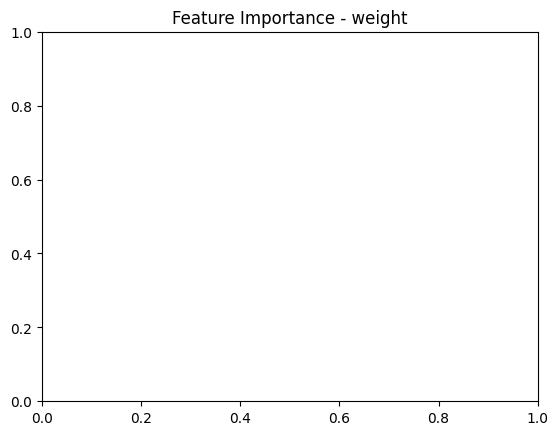

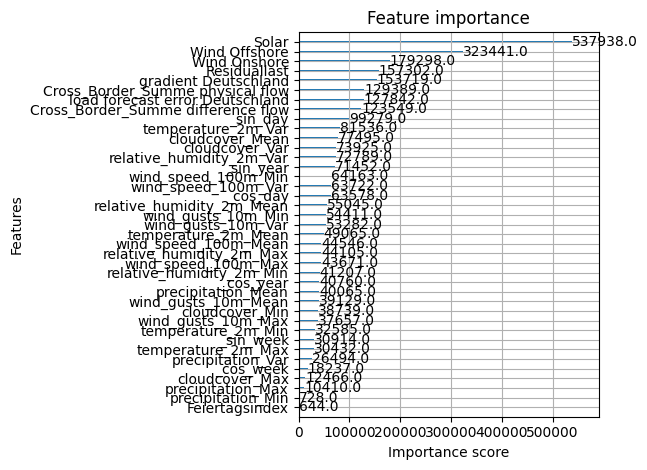

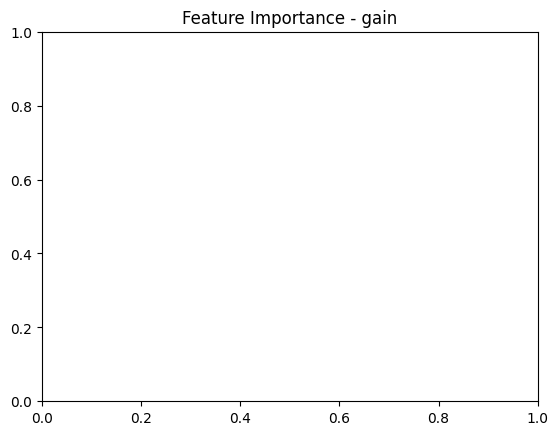

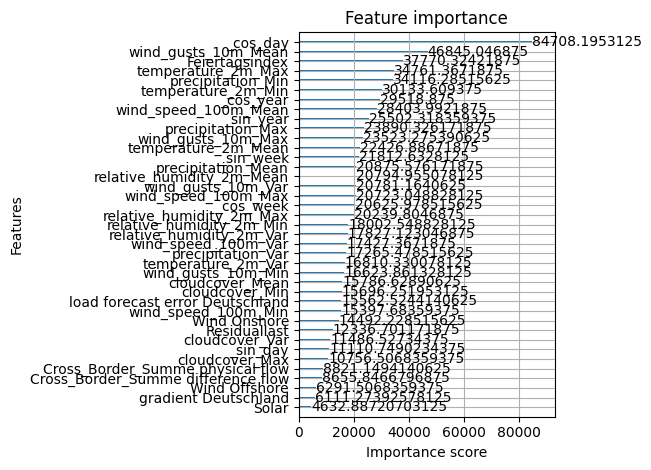

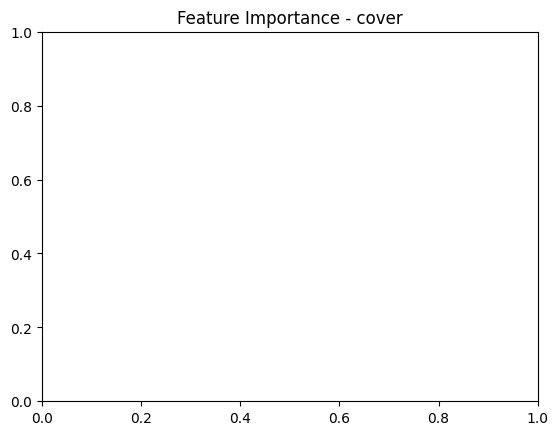

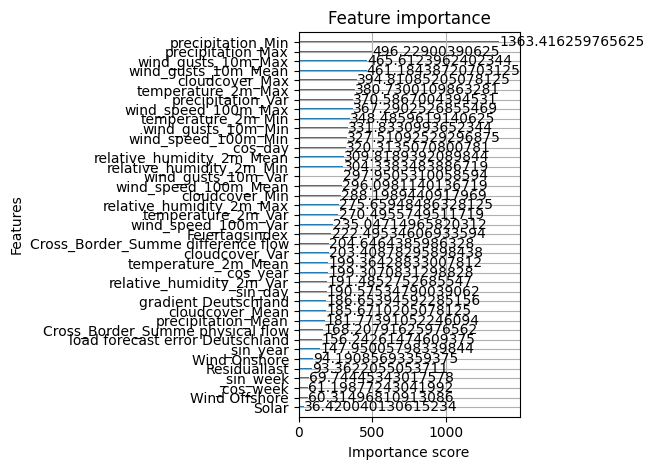

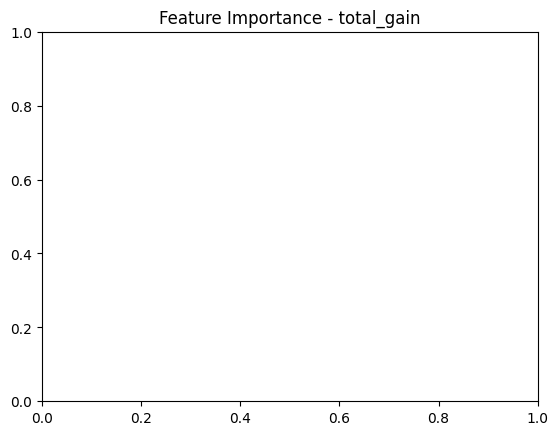

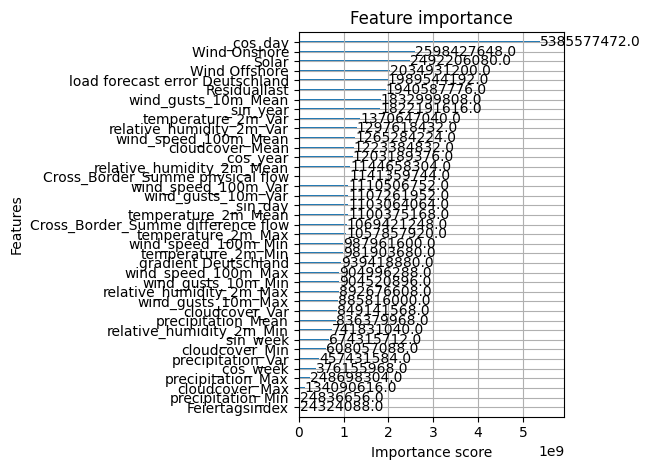

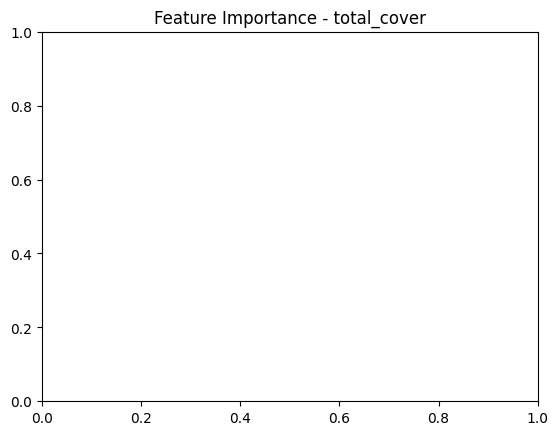

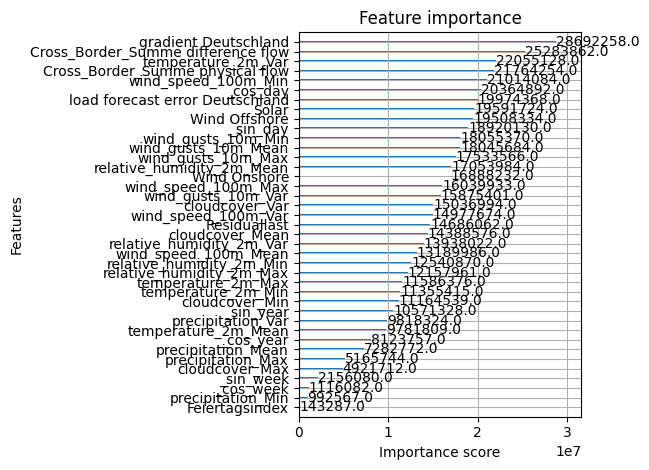

[('weight',
  {'Solar': 537938.0,
   'Wind Offshore': 323441.0,
   'Wind Onshore': 179298.0,
   'Residuallast': 157302.0,
   '_sin_year': 71452.0,
   '_cos_year': 40760.0,
   '_sin_week': 30914.0,
   '_cos_week': 18237.0,
   '_sin_day': 99279.0,
   '_cos_day': 63578.0,
   'load forecast error Deutschland': 127842.0,
   'gradient Deutschland': 153719.0,
   'Feiertagsindex': 644.0,
   'Cross_Border_Summe physical flow': 129389.0,
   'Cross_Border_Summe difference flow': 123549.0,
   'cloudcover_Mean': 77495.0,
   'cloudcover_Var': 73925.0,
   'cloudcover_Min': 38739.0,
   'cloudcover_Max': 12466.0,
   'temperature_2m_Mean': 49065.0,
   'temperature_2m_Var': 81536.0,
   'temperature_2m_Min': 32585.0,
   'temperature_2m_Max': 30432.0,
   'relative_humidity_2m_Mean': 55045.0,
   'relative_humidity_2m_Var': 72789.0,
   'relative_humidity_2m_Min': 41207.0,
   'relative_humidity_2m_Max': 44105.0,
   'precipitation_Mean': 40065.0,
   'precipitation_Var': 26494.0,
   'precipitation_Min': 728.0,


In [9]:
model.get_feature_importance(importance_type="all")